# Data Processing (Raw)

In [1]:
import pandas as pd


df_jan = pd.read_csv('../../data/bicing/raw/2023_01_STATIONS.csv')
df_feb = pd.read_csv('../../data/bicing/raw/2023_02_STATIONS.csv')
df_mar = pd.read_csv('../../data/bicing/raw/2023_03_STATIONS.csv')
df_apr = pd.read_csv('../../data/bicing/raw/2023_04_STATIONS.csv')
df_may = pd.read_csv('../../data/bicing/raw/2023_05_STATIONS.csv')
df_jun = pd.read_csv('../../data/bicing/raw/2023_06_STATIONS.csv')
df_jul = pd.read_csv('../../data/bicing/raw/2023_07_STATIONS.csv')
df_aug = pd.read_csv('../../data/bicing/raw/2023_08_STATIONS.csv')
df_sep = pd.read_csv('../../data/bicing/raw/2023_09_STATIONS.csv')
df_oct = pd.read_csv('../../data/bicing/raw/2023_10_STATIONS.csv')
df_nov = pd.read_csv('../../data/bicing/raw/2023_11_STATIONS.csv')
df_dec = pd.read_csv('../../data/bicing/raw/2023_12_STATIONS.csv')


/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_28657/2196828799.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aug = pd.read_csv('../../data/bicing/raw/2023_08_STATIONS.csv')
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_28657/2196828799.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sep = pd.read_csv('../../data/bicing/raw/2023_09_STATIONS.csv')


## Filter Data From Month

In [4]:
#convert last_updated and last_reported to datetime
all_months = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]
for df_month in all_months:
    df_month['last_updated'] = pd.to_datetime(df_month['last_updated'], unit='s')
    df_month['last_reported'] = pd.to_datetime(df_month['last_reported'], unit='s')


In [38]:
## Validate each month only have records for that month
df_jan = df_jan[(df_jan['last_updated'].dt.month == 1) & (df_jan['last_reported'].dt.year == 2023)]
df_feb = df_feb[(df_feb['last_updated'].dt.month == 2) & (df_feb['last_reported'].dt.year == 2023)]
df_mar = df_mar[(df_mar['last_updated'].dt.month == 3) & (df_mar['last_reported'].dt.year == 2023)]
df_apr = df_apr[(df_apr['last_updated'].dt.month == 4) & (df_apr['last_reported'].dt.year == 2023)]
df_may = df_may[(df_may['last_updated'].dt.month == 5) & (df_may['last_reported'].dt.year == 2023)]
df_jun = df_jun[(df_jun['last_updated'].dt.month == 6) & (df_jun['last_reported'].dt.year == 2023)]
df_jul = df_jul[(df_jul['last_updated'].dt.month == 7) & (df_jul['last_reported'].dt.year == 2023)]
df_aug = df_aug[(df_aug['last_updated'].dt.month == 8) & (df_aug['last_reported'].dt.year == 2023)]
df_sep = df_sep[(df_sep['last_updated'].dt.month == 9) & (df_sep['last_reported'].dt.year == 2023)]
df_oct = df_oct[(df_oct['last_updated'].dt.month == 10) & (df_oct['last_reported'].dt.year == 2023)]
df_nov = df_nov[(df_nov['last_updated'].dt.month == 11) & (df_nov['last_reported'].dt.year == 2023)]
df_dec = df_dec[(df_dec['last_updated'].dt.month == 12) & (df_dec['last_reported'].dt.year == 2023)]


## Get Final DF Columns

In [39]:
columns_to_keep = ['station_id', 'num_bikes_available',
                       'num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike', 'num_docks_available',
                       'last_reported', 'status', 'is_renting', 'is_returning']
df_2023 = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec])[columns_to_keep]
df_2023.head(5)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,status,is_renting,is_returning
6578,1.0,37.0,35.0,2.0,9.0,2023-01-01 00:01:53,IN_SERVICE,1.0,1.0
6579,2.0,6.0,6.0,0.0,23.0,2023-01-01 00:02:07,IN_SERVICE,1.0,1.0
6580,3.0,23.0,21.0,2.0,4.0,2023-01-01 00:04:26,IN_SERVICE,1.0,1.0
6581,4.0,20.0,20.0,0.0,1.0,2023-01-01 00:03:26,IN_SERVICE,1.0,1.0
6582,5.0,4.0,4.0,0.0,35.0,2023-01-01 00:01:01,IN_SERVICE,1.0,1.0


## Add usage

In [40]:
#add usage to the dataset
df_2023['usage'] = df_2023.groupby(
            ['station_id'])['num_bikes_available'].diff()
df_2023['usage'] = df_2023['usage'].apply(
            lambda x: abs(x))
df_2023.head(3)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,status,is_renting,is_returning,usage
6578,1.0,37.0,35.0,2.0,9.0,2023-01-01 00:01:53,IN_SERVICE,1.0,1.0,NaN
6579,2.0,6.0,6.0,0.0,23.0,2023-01-01 00:02:07,IN_SERVICE,1.0,1.0,NaN
6580,3.0,23.0,21.0,2.0,4.0,2023-01-01 00:04:26,IN_SERVICE,1.0,1.0,NaN


In [41]:
df_2023.isnull().sum()
df_2023['usage'] = df_2023['usage'].fillna(0)

## ADD Date

In [42]:
df_2023['date'] = df_2023['last_reported'].dt.date
df_2023['date'] = pd.to_datetime(df_2023['date'])
df_2023.head(3)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,status,is_renting,is_returning,usage,date
6578,1.0,37.0,35.0,2.0,9.0,2023-01-01 00:01:53,IN_SERVICE,1.0,1.0,0.0,2023-01-01
6579,2.0,6.0,6.0,0.0,23.0,2023-01-01 00:02:07,IN_SERVICE,1.0,1.0,0.0,2023-01-01
6580,3.0,23.0,21.0,2.0,4.0,2023-01-01 00:04:26,IN_SERVICE,1.0,1.0,0.0,2023-01-01


## Add Day of the week and Weekend information

In [43]:
#add name of the day
df_2023['day_of_week'] = df_2023['last_reported'].dt.day_name()
df_2023['is_weekend'] = df_2023['last_reported'].dt.dayofweek.apply(lambda x: 1 if x > 4 else 0)
df_2023['hour'] = df_2023['last_reported'].dt.hour
df_2023.head(3)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,status,is_renting,is_returning,usage,date,day_of_week,is_weekend,hour
6578,1.0,37.0,35.0,2.0,9.0,2023-01-01 00:01:53,IN_SERVICE,1.0,1.0,0.0,2023-01-01,Sunday,1,0
6579,2.0,6.0,6.0,0.0,23.0,2023-01-01 00:02:07,IN_SERVICE,1.0,1.0,0.0,2023-01-01,Sunday,1,0
6580,3.0,23.0,21.0,2.0,4.0,2023-01-01 00:04:26,IN_SERVICE,1.0,1.0,0.0,2023-01-01,Sunday,1,0


## Save 2023 Dataset

In [44]:
df_2023.to_csv('../../data/bicing/processed/2023.csv', index=False)

## Usage in a month

In [11]:
import pandas as pd 
df_2023_a = pd.read_csv('../../data/bicing/processed/2023.csv')



In [13]:
df_2023 = df_2023_a.copy()
df_2023['date'] = pd.to_datetime(df_2023['date'])
df_2023['spring'] = df_2023['date'].dt.month.isin([3, 4, 5])
df_2023['summer'] = df_2023['date'].dt.month.isin([6, 7, 8])
df_2023['autumn'] = df_2023['date'].dt.month.isin([9, 10, 11])
df_2023['winter'] = df_2023['date'].dt.month.isin([12, 1, 2])

In [2]:
df_2023.columns

Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available',
       'last_reported', 'status', 'is_renting', 'is_returning', 'usage',
       'date', 'day_of_week', 'is_weekend', 'hour'],
      dtype='object')

### March

In [7]:
df_2023['last_reported'] = pd.to_datetime(df_2023['last_reported'])
df_march = df_2023[df_2023['last_reported'].dt.month == 3]
df_march.head(4)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,status,is_renting,is_returning,usage,date,day_of_week,is_weekend,hour
8117480,204.0,19.0,11.0,8.0,14.0,2023-03-01 00:00:00,IN_SERVICE,1.0,1.0,17.0,2023-03-01,Wednesday,0,0
8117734,461.0,6.0,2.0,4.0,22.0,2023-03-01 00:00:00,IN_SERVICE,1.0,1.0,1.0,2023-03-01,Wednesday,0,0
8117791,1.0,34.0,32.0,2.0,12.0,2023-03-01 00:01:12,IN_SERVICE,1.0,1.0,0.0,2023-03-01,Wednesday,0,0
8117792,2.0,6.0,6.0,0.0,23.0,2023-03-01 00:04:36,IN_SERVICE,1.0,1.0,0.0,2023-03-01,Wednesday,0,0


In [8]:
import plotly.express as px

df_b = df_march.groupby(['date','day_of_week'])['usage'].sum().reset_index()

# add day of the week like "Sunday", "Monday", etc.


fig = px.line(df_b, x='date', y='usage', title='Bicing usage over the month of March 2023', markers=True, hover_data=['date', 'usage','day_of_week'])

# Identify weekends
weekends = pd.date_range(start='2023-03-01', end='2023-03-31', freq='W-SAT').tolist() + \
           pd.date_range(start='2023-03-01', end='2023-03-31', freq='W-SUN').tolist()

# Ensure weekends are in pairs
weekends.sort()
weekend_pairs = [(weekends[i], weekends[i + 1]) for i in range(0, len(weekends), 2)]

# Add vertical rectangles for weekends
show_legend_added = False
for start, end in weekend_pairs:
    fig.add_vrect(
        x0=start, x1=end,
        fillcolor="turquoise", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(color='turquoise', size=10),
    showlegend=True,
    name='Weekend Days'
)


fig.show()

### July

In [9]:
df_july = df_2023[df_2023['last_reported'].dt.month == 7]
df_july.head(4)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,status,is_renting,is_returning,usage,date,day_of_week,is_weekend,hour
24390712,1.0,24.0,14.0,10.0,19.0,2023-07-01 00:04:09,IN_SERVICE,1.0,1.0,5.0,2023-07-01,Saturday,1,0
24390713,2.0,8.0,7.0,1.0,18.0,2023-07-01 00:02:38,IN_SERVICE,1.0,1.0,0.0,2023-07-01,Saturday,1,0
24390714,3.0,13.0,13.0,0.0,13.0,2023-07-01 00:01:19,IN_SERVICE,1.0,1.0,6.0,2023-07-01,Saturday,1,0
24390715,4.0,13.0,13.0,0.0,2.0,2023-07-01 00:02:03,IN_SERVICE,1.0,1.0,1.0,2023-07-01,Saturday,1,0


In [10]:
import plotly.express as px

df_c = df_july.groupby(['date','day_of_week'])['usage'].sum().reset_index()


fig = px.line(df_c, x='date', y='usage', title='Bicing usage over the month of July 2023', markers=True, hover_data=['date', 'usage','day_of_week'])

# Identify weekends
weekends = pd.date_range(start='2023-07-01', end='2023-07-31', freq='W-SAT').tolist() + \
           pd.date_range(start='2023-07-01', end='2023-07-31', freq='W-SUN').tolist()

# Ensure weekends are in pairs
weekends.sort()
weekend_pairs = [(weekends[i], weekends[i + 1]) for i in range(0, len(weekends), 2)]

# Add vertical rectangles for weekends
show_legend_added = False
for start, end in weekend_pairs:
    fig.add_vrect(
        x0=start, x1=end,
        fillcolor="turquoise", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(color='turquoise', size=10),
    showlegend=True,
    name='Weekend Days'
)


fig.show()

## Hourly Usage

### March

In [11]:
import plotly.express as px

df_weekend_march = df_march[df_march['is_weekend'] == 1].groupby('hour')['usage'].sum().reset_index()
df_week_march = df_march[df_march['is_weekend'] == 0].groupby('hour')['usage'].sum().reset_index()
# add day of the week like "Sunday", "Monday", etc.


fig = px.line(df_week_march, x='hour', y='usage', title='Bicing hourly usage of March 2023', markers=True)
#fig.add_scatter(x=df_weekend['hour'], y=df_weekend['usage'], mode='lines')
# Add the weekend line with red markers
fig.add_scatter(
    x=df_weekend_march['hour'],
    y=df_weekend_march['usage'],
    mode='lines+markers',
    name='Weekend',
    line=dict(color='red'),
    marker=dict(symbol='circle', size=6)
)

# Add a dummy scatter trace for legend entry
fig.add_scatter(
    x=[None],
    y=[None],
    mode='lines',
    marker=dict(color='blue', size=10),
    name='Weekdays'
)




fig.show()

In [12]:
import plotly.express as px

df_weekend_july = df_july[df_july['is_weekend'] == 1].groupby('hour')['usage'].sum().reset_index()
df_week_july = df_july[df_july['is_weekend'] == 0].groupby('hour')['usage'].sum().reset_index()
# add day of the week like "Sunday", "Monday", etc.


fig = px.line(df_week_july, x='hour', y='usage', title='Bicing hourly usage of July 2023', markers=True)
#fig.add_scatter(x=df_weekend['hour'], y=df_weekend['usage'], mode='lines')
# Add the weekend line with red markers
fig.add_scatter(
    x=df_weekend_july['hour'],
    y=df_weekend_july['usage'],
    mode='lines+markers',
    name='Weekend',
    line=dict(color='red'),
    marker=dict(symbol='circle', size=6)
)

# Add a dummy scatter trace for legend entry
fig.add_scatter(
    x=[None],
    y=[None],
    mode='lines',
    marker=dict(color='blue', size=10),
    name='Weekdays'
)




fig.show()

## Hourly usage July vs March

In [13]:
import plotly.express as px

df_weekend_july = df_july[df_july['is_weekend'] == 1].groupby('hour')['usage'].sum().reset_index()
df_week_july = df_july[df_july['is_weekend'] == 0].groupby('hour')['usage'].sum().reset_index()
df_weekend_march = df_march[df_march['is_weekend'] == 1].groupby('hour')['usage'].sum().reset_index()
df_week_march = df_march[df_march['is_weekend'] == 0].groupby('hour')['usage'].sum().reset_index()

# add day of the week like "Sunday", "Monday", etc.


fig = px.line(df_week_july, x='hour', y='usage', title='Bicing hourly usage of July vs March 2023 (week day vs Wekeend)', markers=True)
#fig.add_scatter(x=df_weekend['hour'], y=df_weekend['usage'], mode='lines')
# Add the weekend July line with red markers
fig.add_scatter(
    x=df_weekend_july['hour'],
    y=df_weekend_july['usage'],
    mode='lines+markers',
    name='Weekends July',
    line=dict(color='red'),
    marker=dict(symbol='circle', size=6)
)

fig.add_scatter(
    x=df_weekend_march['hour'],
    y=df_weekend_march['usage'],
    mode='lines+markers',
    name='Weekends March',
    line=dict(color='orange'),
    marker=dict(symbol='circle', size=6)
)

fig.add_scatter(
    x=df_week_march['hour'],
    y=df_week_march['usage'],
    mode='lines+markers',
    name='Week Days March',
    line=dict(color='turquoise'),
    marker=dict(symbol='circle', size=6)
)

# Add a dummy scatter trace for legend entry
fig.add_scatter(
    x=[None],
    y=[None],
    mode='lines',
    marker=dict(color='blue', size=10),
    name='Weekdays July'
)




fig.show()

In [17]:
#df_march['day_of_week'] = df_march['date'].dt.day_name()
df_day_of_week_usage_march = df_march.groupby(['date','day_of_week'])['usage'].sum().reset_index(name='usage').groupby(['day_of_week'])['usage'].median().reset_index() 
df_day_of_week_usage_march

,day_of_week,usage
0,Friday,76606.0
1,Monday,70671.0
2,Saturday,63871.0
3,Sunday,59242.0
4,Thursday,77906.0
5,Tuesday,74832.0
6,Wednesday,77351.0


In [18]:

df_day_of_week_usage_july = df_july.groupby(['date','day_of_week'])['usage'].sum().reset_index(name='usage').groupby(['day_of_week'])['usage'].median().reset_index() 
df_day_of_week_usage_july

,day_of_week,usage
0,Friday,72503.0
1,Monday,69880.0
2,Saturday,60418.0
3,Sunday,56812.0
4,Thursday,73859.5
5,Tuesday,71495.0
6,Wednesday,74498.5


In [21]:
# order dataset weekdays
# Define the correct order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical type with the correct order
df_day_of_week_usage_march['day_of_week'] = pd.Categorical(df_day_of_week_usage_march['day_of_week'], categories=day_order, ordered=True)
df_day_of_week_usage_july['day_of_week'] = pd.Categorical(df_day_of_week_usage_july['day_of_week'], categories=day_order, ordered=True)

# Sort DataFrame by the ordered categorical
df_day_of_week_usage_march = df_day_of_week_usage_march.sort_values('day_of_week')
df_day_of_week_usage_july = df_day_of_week_usage_july.sort_values('day_of_week')


df_day_of_week_usage_march['month'] = 'March'
df_day_of_week_usage_july['month'] = 'July'
df_combined = pd.concat([df_day_of_week_usage_march, df_day_of_week_usage_july])

fig = px.line(df_combined, x='day_of_week', y='usage', color='month', title='Bicing usage per day of the week in March and July 2023', markers=True,
              category_orders={'day_of_week': day_order})

# Find the most used day for March and July
most_used_day_march = df_day_of_week_usage_march.loc[df_day_of_week_usage_march['usage'].idxmax()]
most_used_day_july = df_day_of_week_usage_july.loc[df_day_of_week_usage_july['usage'].idxmax()]

# Add annotations for the most used days
fig.add_annotation(
    x=most_used_day_march['day_of_week'],
    y=most_used_day_march['usage'],
    text=f"Most used in March: {most_used_day_march['day_of_week']}",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    bgcolor="turquoise"
)

fig.add_annotation(
    x=most_used_day_july['day_of_week'],
    y=most_used_day_july['usage'],
    text=f"Most used in July: {most_used_day_july['day_of_week']}",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    bgcolor="springgreen"
)
fig.show()

import ploty

In [3]:
df_2023['date'] = pd.to_datetime(df_2023['date'])
df_2023['month'] = df_2023['date'].dt.month_name()

In [4]:
df_most_usage_day = df_2023.groupby(['month', 'date', 'day_of_week'])['usage'].sum().reset_index(
    name='usage').groupby(['month','day_of_week'])['usage'].median().reset_index()
df_most_usage_day

,month,day_of_week,usage
0,April,Friday,82986.5
1,April,Monday,74184.0
2,April,Saturday,62121.0
3,April,Sunday,59874.0
4,April,Thursday,79370.5
...,...,...,...
79,September,Saturday,71715.5
80,September,Sunday,64444.0
81,September,Thursday,82536.0
82,September,Tuesday,76573.0


In [17]:
import plotly.express as px

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'day_of_week' to a categorical type with the correct order
df_most_usage_day['day_of_week'] = pd.Categorical(df_most_usage_day['day_of_week'], categories=day_order, ordered=True)
df_most_usage_day['month'] = pd.Categorical(df_most_usage_day['month'], categories=month_order, ordered=True)


# Sort the DataFrame
df_most_usage_day = df_most_usage_day.sort_values(by=['month', 'day_of_week'])

fig = px.line(df_most_usage_day, x='day_of_week', y='usage', color='month', title='Bicing usage per day 2023', markers=True,
              category_orders={'day_of_week': day_order}, width=1200, height=600)
fig.show()

In [18]:
import random
months = df_most_usage_day['month'].unique()
most_used_day = []

for month in months:
    # Find the most used day for each month
    most_used_day_month = df_most_usage_day.loc[df_most_usage_day[df_most_usage_day['month'] == month]['usage'].idxmax(
    )]
    most_used_day.append(most_used_day_month)

colors = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure',
          'beige', 'bisque', 'black', 'blanchedalmond', 'blue',
          'blueviolet', 'brown', 'burlywood', 'cadetblue',
          'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
          'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan',
          'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen',
          'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange',
          'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
          'darkslateblue', 'darkslategray', 'darkslategrey',
          'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue',
          'dimgray', 'dimgrey', 'dodgerblue', 'firebrick',
          'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro',
          'ghostwhite', 'gold', 'goldenrod', 'gray', 'grey', 'green',
          'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo',
          'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen',
          'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan',
          'lightgoldenrodyellow', 'lightgray', 'lightgrey',
          'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen',
          'lightskyblue', 'lightslategray', 'lightslategrey',
          'lightsteelblue', 'lightyellow', 'lime', 'limegreen',
          'linen', 'magenta', 'maroon', 'mediumaquamarine',
          'mediumblue', 'mediumorchid', 'mediumpurple',
          'mediumseagreen', 'mediumslateblue', 'mediumspringgreen',
          'mediumturquoise', 'mediumvioletred', 'midnightblue',
          'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy',
          'oldlace', 'olive', 'olivedrab', 'orange', 'orangered',
          'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown',
          'royalblue', 'rebeccapurple', 'saddlebrown', 'salmon',
          'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver',
          'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow',
          'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato',
          'turquoise', 'violet', 'wheat', 'white', 'whitesmoke',
          'yellow', 'yellowgreen']


for most_used_day_month in most_used_day:
    fig.add_annotation(
        x=most_used_day_month['day_of_week'],
        y=most_used_day_month['usage'],
        text=f"Most used in {most_used_day_month['month']}: {
            most_used_day_month['day_of_week']}",
        showarrow=True,
        arrowhead=2,
        ax=20,
        ay=-30,
        bgcolor=colors[random.randint(0, len(colors) - 1)]
    )
fig.show()

### Season's Usage

In [19]:
df_2023['spring'] = df_2023['date'].dt.month.isin([3, 4, 5])
df_2023['summer'] = df_2023['date'].dt.month.isin([6, 7, 8])
df_2023['autumn'] = df_2023['date'].dt.month.isin([9, 10, 11])
df_2023['winter'] = df_2023['date'].dt.month.isin([12, 1, 2])


In [34]:
df_2023['season'] = df_2023['date'].dt.month.apply(lambda x: 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn' if x in [9, 10, 11] else 'Winter')
df_2023.head(4)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,status,is_renting,is_returning,usage,date,day_of_week,is_weekend,hour,month,spring,summer,autumn,winter,season
0,1.0,37.0,35.0,2.0,9.0,2023-01-01 00:01:53,IN_SERVICE,1.0,1.0,0.0,2023-01-01,Sunday,1,0,January,False,False,False,True,Winter
1,2.0,6.0,6.0,0.0,23.0,2023-01-01 00:02:07,IN_SERVICE,1.0,1.0,0.0,2023-01-01,Sunday,1,0,January,False,False,False,True,Winter
2,3.0,23.0,21.0,2.0,4.0,2023-01-01 00:04:26,IN_SERVICE,1.0,1.0,0.0,2023-01-01,Sunday,1,0,January,False,False,False,True,Winter
3,4.0,20.0,20.0,0.0,1.0,2023-01-01 00:03:26,IN_SERVICE,1.0,1.0,0.0,2023-01-01,Sunday,1,0,January,False,False,False,True,Winter


In [37]:
usage_by_season_df = df_2023.groupby(['season', 'date', 'day_of_week'])['usage'].sum().reset_index(
    name='usage').groupby(['season','day_of_week'])['usage'].median().reset_index()
usage_by_season_df.head(1)

,season,day_of_week,usage
0,Autumn,Friday,80791.0


In [38]:
import plotly.express as px

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Convert 'day_of_week' to a categorical type with the correct order
usage_by_season_df['day_of_week'] = pd.Categorical(usage_by_season_df['day_of_week'], categories=day_order, ordered=True)
usage_by_season_df['season'] = pd.Categorical(usage_by_season_df['season'], categories=season_order, ordered=True)


# Sort the DataFrame
usage_by_season = usage_by_season_df.sort_values(by=['season', 'day_of_week'])

fig = px.line(usage_by_season_df, x='day_of_week', y='usage', color='season', title='Bicing usage per day By Season 2023', markers=True,
              category_orders={'day_of_week': day_order}, width=1200, height=600)
fig.show()

In [45]:
usage_hour_by_season_df_week = df_2023[df_2023['is_weekend'] == 0].groupby(['season', 'date', 'hour'])['usage'].sum().reset_index(
    name='usage').groupby(['season','hour'])['usage'].median().reset_index()
usage_hour_by_season_df_week.head(1)

,season,hour,usage
0,Autumn,0,977.0


In [46]:
usage_hour_by_season_df_weekend = df_2023[df_2023['is_weekend'] == 1].groupby(['season', 'date', 'hour'])['usage'].sum().reset_index(
    name='usage').groupby(['season','hour'])['usage'].median().reset_index()
usage_hour_by_season_df_weekend.head(1)

,season,hour,usage
0,Autumn,0,2276.0


In [39]:
usage_hour_by_season_df = df_2023.groupby(['season', 'date', 'hour'])['usage'].sum().reset_index(
    name='usage').groupby(['season','hour'])['usage'].median().reset_index()
usage_hour_by_season_df.head(1)

,season,hour,usage
0,Autumn,0,1115.0


In [44]:
import plotly.express as px

hour_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Convert 'day_of_week' to a categorical type with the correct order
usage_hour_by_season_df['hour'] = pd.Categorical(usage_hour_by_season_df['hour'], categories=hour_order, ordered=True)
usage_hour_by_season_df['season'] = pd.Categorical(usage_hour_by_season_df['season'], categories=season_order, ordered=True)


# Sort the DataFrame
usage_hour_by_season_df = usage_hour_by_season_df.sort_values(by=['season', 'hour'])

fig = px.line(usage_hour_by_season_df, x='hour', y='usage', color='season', title='Bicing usage per Hour By Season 2023', markers=True,
              category_orders={'hour': day_order}, width=1200, height=600, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [55]:
usage_hour_by_season_df_w = df_2023.groupby(['season','is_weekend', 'date', 'hour'])['usage'].sum().reset_index(
    name='usage').groupby(['season','is_weekend','hour'])['usage'].median().reset_index()
usage_hour_by_season_df_w.head(1)

,season,is_weekend,hour,usage
0,Autumn,0,0,977.0


In [57]:
import plotly.express as px

hour_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Convert 'day_of_week' to a categorical type with the correct order
usage_hour_by_season_df_w['hour'] = pd.Categorical(usage_hour_by_season_df_w['hour'], categories=hour_order, ordered=True)
usage_hour_by_season_df_w['season'] = pd.Categorical(usage_hour_by_season_df_w['season'], categories=season_order, ordered=True)
# Map is_weekend to 'Weekday' and 'Weekend'
usage_hour_by_season_df_w['is_weekend_2'] = usage_hour_by_season_df_w['is_weekend'].map({0: 'No', 1: 'Yes'})


# Sort the DataFrame
usage_hour_by_season_df_w = usage_hour_by_season_df_w.sort_values(by=['season', 'hour'])

fig = px.line(usage_hour_by_season_df_w, x='hour', y='usage', color='season', title='Bicing usage per Hour By Season 2023 (W/ Weekend info)', markers=True,line_dash='is_weekend_2',
              category_orders={'hour': day_order}, width=1200, height=600, color_discrete_sequence=px.colors.qualitative.Pastel,labels={
        'hour': 'Hour of the Day',
        'usage': 'Median Usage',
        'season': 'Season',
        'is_weekend_2': 'Weekend?'
    })
fig.show()

### Weather

In [60]:
df_weather = pd.read_csv('../../data/weather_clean.csv')
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather.head()

,date,hour,temperature,rainfall
0,2023-01-01,0,15,0.0
1,2023-01-01,1,14,0.0
2,2023-01-01,2,14,0.0
3,2023-01-01,3,14,0.0
4,2023-01-01,4,14,0.0


In [61]:
df_2023_weather = pd.merge(df_2023, df_weather, on='date', how='left')
df_2023_weather.head(3)

## Top Stations

In [112]:
#count which stations have more rows with 0 num_docks_available

top_stations_w_less_docking = df_2023.groupby('station_id')['num_docks_available'].apply(lambda x: (x == 0).sum()).sort_values(ascending=False).head(5)

In [113]:
top_stations_w_less_docking

station_id
57.0     28474
32.0     17329
31.0     13513
378.0    11795
446.0    10954
Name: num_docks_available, dtype: int64

In [114]:
top_stations_w_no_bikes = df_2023.groupby('station_id')['num_bikes_available'].apply(lambda x: (x == 0).sum()).sort_values(ascending=False).head(5)
top_stations_w_no_bikes

station_id
431.0    26249
102.0    23780
284.0    22717
305.0    22673
92.0     22513
Name: num_bikes_available, dtype: int64

# Bicing Data Validation

## Top 3 Stations

In [16]:
import pandas as pd
df_stations = pd.read_csv('../../data/bicing/processed/2024_STATION_LOCATIONS.csv')
df_stations.head(3)

,station_id,lat,lon,altitude,post_code,capacity,address,district
0,1,41.397978,2.180107,16.0,8013,46,"GRAN VIA CORTS CATALANES, 760",Eixample
1,2,41.395488,2.177198,17.0,8013,29,"C/ ROGER DE FLOR, 126",Eixample
2,3,41.394156,2.181331,11.0,8013,27,"C/ NÀPOLS, 82",Eixample


In [32]:
import plotly.express as px
import plotly.graph_objects as go

top_stations = 3
#find top 3 stations
# Aggregate the data
station_usage = df_2023.groupby(['station_id','date'])['usage'].sum().reset_index().sort_values('usage', ascending=False)

# Get the top 3 stations
top_stations = station_usage.head(top_stations)
df_stations_info = pd.merge(top_stations, df_stations, on='station_id', how='left')

# Create the table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Station ID', 'Address', 'Total Usage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_stations_info['station_id'],df_stations_info['address'], df_stations_info['usage']],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title=f'Top Stations by Usage in 2023', width=800, height=300)

# Show the plot
fig.show()

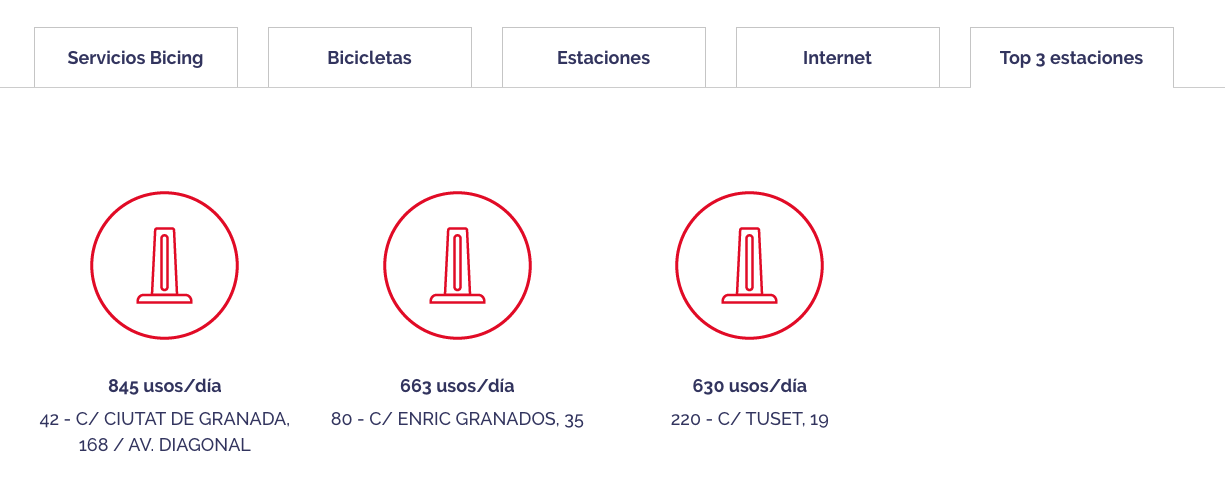

In [29]:
from IPython.display import Image

Image(filename="../../assets/bicing-0.png")


## Total number of stations

In [46]:
from IPython.display import HTML
total_stations = df_stations['station_id'].nunique()
total_stations


# Display text in a large font size using HTML
html_content = '<h1 style="font-size: 48px;">Total Number of Stations: {}    🤥🤥🤥?</h1>'.format(total_stations)
HTML(html_content)

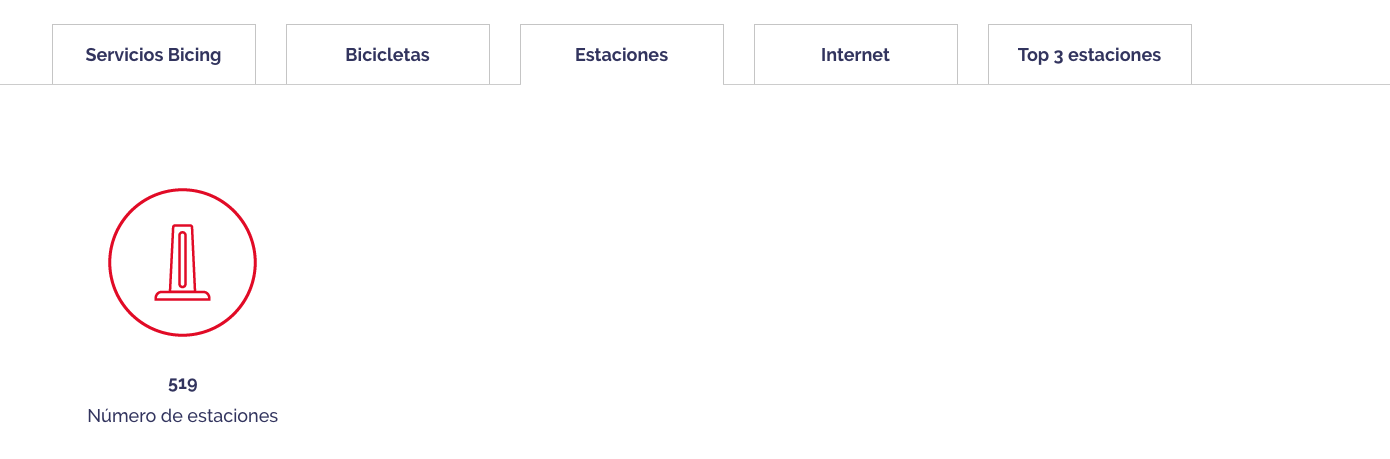

In [33]:
from IPython.display import Image

Image(filename="../../assets/bicing-1.png")


## Number of bikes

In [47]:
import pandas as pd


df_jan = pd.read_csv('../../data/bicing/raw/2023_01_STATIONS.csv', )
df_feb = pd.read_csv('../../data/bicing/raw/2023_02_STATIONS.csv')
df_mar = pd.read_csv('../../data/bicing/raw/2023_03_STATIONS.csv')
df_apr = pd.read_csv('../../data/bicing/raw/2023_04_STATIONS.csv')
df_may = pd.read_csv('../../data/bicing/raw/2023_05_STATIONS.csv')
df_jun = pd.read_csv('../../data/bicing/raw/2023_06_STATIONS.csv')
df_jul = pd.read_csv('../../data/bicing/raw/2023_07_STATIONS.csv')
df_aug = pd.read_csv('../../data/bicing/raw/2023_08_STATIONS.csv')
df_sep = pd.read_csv('../../data/bicing/raw/2023_09_STATIONS.csv')
df_oct = pd.read_csv('../../data/bicing/raw/2023_10_STATIONS.csv')
df_nov = pd.read_csv('../../data/bicing/raw/2023_11_STATIONS.csv')
df_dec = pd.read_csv('../../data/bicing/raw/2023_12_STATIONS.csv')


/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_15869/2842280653.py:11: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_15869/2842280653.py:12: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [65]:
columns_to_keep = ['station_id', 'num_bikes_available','last_updated']
df_2023_c = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec])[columns_to_keep]
df_2023_c['last_updated'] = pd.to_datetime(df_2023_c['last_updated'], unit='s')
df_2023_c.head(2)

,station_id,num_bikes_available,last_updated
0,1.0,38.0,2022-12-31 22:59:53
1,2.0,6.0,2022-12-31 22:59:53


In [66]:
len(df_2023_c) #49193647
df_2023_c = df_2023_c.drop_duplicates()
len(df_2023_c) #49193647
49193647 - 49140700

52947

In [72]:
total_bikes = df_2023_c.groupby(['last_updated'])['num_bikes_available'].sum().reset_index(name='total_bikes').sort_values('total_bikes', ascending=False).head(3)

total_bikes

,last_updated,total_bikes
14729,2023-02-24 02:49:36,6079.0
11857,2023-02-14 03:29:44,6078.0
8108,2023-02-01 03:00:01,6077.0


Assuming the average bike ride is 15 minutes as Bicing stated in their stats, will check the returns for the next 15 minutes

In [76]:

df_processed_feb = df_feb.copy()
df_processed_feb

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl
0,1,22,20,2,23,1675205833,True,IN_SERVICE,1,1,1,NaN,1675206000,26
1,2,13,13,0,16,1675205776,True,IN_SERVICE,1,1,1,NaN,1675206000,26
2,3,15,14,1,12,1675205811,True,IN_SERVICE,1,1,1,NaN,1675206000,26
3,4,2,2,0,19,1675205913,True,IN_SERVICE,1,1,1,NaN,1675206000,26
4,5,6,6,0,32,1675205756,True,IN_SERVICE,1,1,1,NaN,1675206000,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065824,515,0,11,0,13,1677615221,True,NOT_IN_SERVICE,1,0,0,NaN,1677626100,26
4065825,516,12,11,1,9,1677625907,True,IN_SERVICE,1,1,1,NaN,1677626100,26
4065826,517,11,0,11,9,1677625942,True,IN_SERVICE,1,1,1,NaN,1677626100,26
4065827,518,9,7,2,18,1677625916,True,IN_SERVICE,1,1,1,NaN,1677626100,26


In [80]:
import pandas as pd
df_processed_feb = df_feb.copy()
df_processed_feb['last_updated'] = pd.to_datetime(df_processed_feb['last_updated'], unit='s')
date = '2023-02-24 02:49:36'
average_bike_ride = 15
#add 15 minutes to the date
date_threshold = pd.to_datetime(date) + pd.Timedelta(minutes=average_bike_ride)
df_processed_feb
df_processed_feb['usage'] = df_processed_feb.groupby(['station_id'])['num_bikes_available'].diff()
df_subset_threshold = df_processed_feb[(df_processed_feb['last_updated'] >= date) & (df_processed_feb['last_updated'] <= date_threshold)]
df_subset_threshold['usage'] = df_subset_threshold['usage'].apply(lambda x: abs(x) if x < 0 else 0)
total_bikes_returned = df_subset_threshold['usage'].sum()
total_bikes_returned

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_15869/4227195545.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



64.0

In [108]:
from IPython.display import HTML
bicing_reported_total_bikes = 7100
most_bikes = total_bikes['total_bikes'].max()
total_bikes_in_df = most_bikes + total_bikes_returned
total_bikes_repaired_by_day = 294
total_estimated_bikes = total_bikes_in_df + total_bikes_repaired_by_day
difference = bicing_reported_total_bikes - total_estimated_bikes 

html_content = f'''
<h4 style="font-size: 32px; color: #333;">
    Bicing Data
    <p style="font-size: 24px; color: #555;">Here are the key statistics:</p>
    <ul style="list-style-type: disc; margin-left: 20px;">
        <li>Total Bikes Reported: <span style="color: #1f77b4;">{bicing_reported_total_bikes}</span></li>
        <li>Average Ride: <span style="color: #ff7f0e;">{int(average_bike_ride)} mins</span></li>
        <li># of Bikes Repaired by day: <span style="color: #2ca02c;">{int(total_bikes_repaired_by_day)}</span></li>
    </ul>
</h4>
<h4 style="font-size: 32px; color: #333;">
    DataFrame Data
    <p style="font-size: 24px; color: #555;">Here are the key statistics:</p>
    <ul style="list-style-type: disc; margin-left: 20px;">
        <li>Highest Amount of Parked Bikes: <span style="color: #d62728;">{int(most_bikes)}</span></li>
        <li>Total Amount of Bikes Returned After Average Bike Ride ({average_bike_ride} min): <span style="color: #9467bd;">{int(total_bikes_returned)}</span></li>
        <li>Total Bikes: <span style="color: #8c564b;">{int(total_bikes_in_df)}</span></li>
        <li>Total Bikes + Repaired ({total_bikes_repaired_by_day}): <span style="color: #e377c2;">{int(total_estimated_bikes)}</span></li>

    </ul>
</h4>
<h4 style="font-size: 32px; color: #333;">
Conclusion:
<ul style="list-style-type: disc; margin-left: 20px;">
        <li>Bikes Gone MIA: <span style="color: #7f7f7f;">{int(difference)}</span></li></ul>

</h4>
'''

html_content = f'''
<h2 style="font-size: 36px; color: #333; font-weight: bold;">Bicing Data Overview</h2>

<p style="font-size: 24px; color: #555; font-weight: bold;">Key Statistics:</p>
<ul style="list-style-type: disc; margin-left: 20px; font-size: 18px;">
    <li>Total Bikes Reported: <span style="color: #1f77b4; font-weight: bold;">{bicing_reported_total_bikes}</span></li>
    <li>Average Ride Duration: <span style="color: #ff7f0e; font-weight: bold;">{int(average_bike_ride)} mins</span></li>
    <li>Bikes Repaired Per Day: <span style="color: #2ca02c; font-weight: bold;">{int(total_bikes_repaired_by_day)}</span></li>
</ul>

<h2 style="font-size: 36px; color: #333; font-weight: bold;">DataFrame Insights</h2>

<p style="font-size: 24px; color: #555; font-weight: bold;">Detailed Statistics:</p>
<ul style="list-style-type: disc; margin-left: 20px; font-size: 18px;">
    <li>Highest Amount of Parked Bikes: <span style="color: #d62728; font-weight: bold;">{int(most_bikes)}</span></li>
    <li>Total Bikes Returned After Average Ride ({average_bike_ride} min): <span style="color: #9467bd; font-weight: bold;">{int(total_bikes_returned)}</span></li>
    <li>Total Number of Bikes: <span style="color: #8c564b; font-weight: bold;">{int(total_bikes_in_df)}</span></li>
    <li>Estimated Total Bikes Including Repairs: <span style="color: #e377c2; font-weight: bold;">{int(total_estimated_bikes)}</span></li>
</ul>

<h2 style="font-size: 36px; color: #333; font-weight: bold;">Conclusion</h2>

<p style="font-size: 24px; color: #555; font-weight: bold;">Key Takeaway:</p>
<ul style="list-style-type: disc; margin-left: 20px; font-size: 18px;">
    <li>Bikes Gone MIA: <span style="color: #7f7f7f; font-weight: bold;">{int(difference)}</span></li>
</ul>
'''
HTML(html_content)

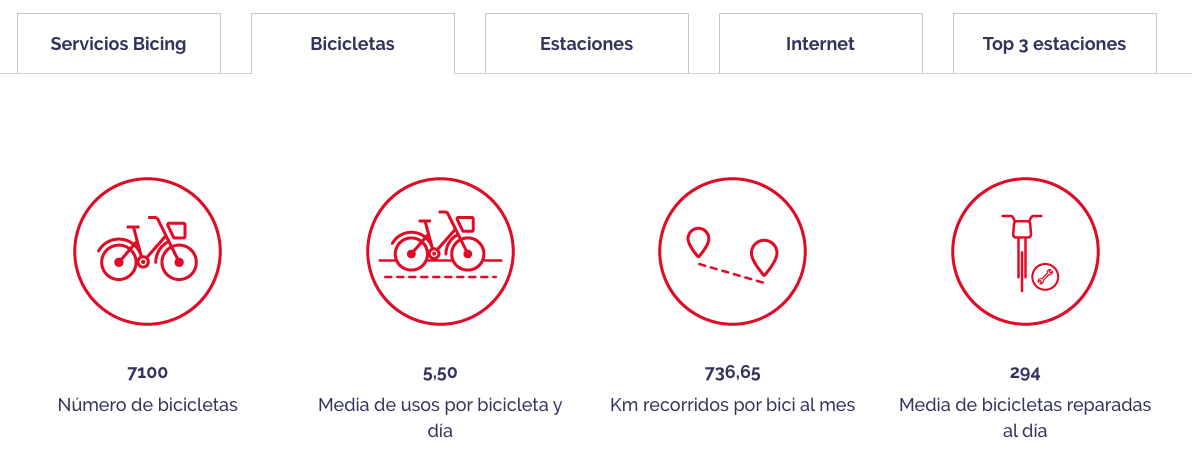

In [41]:
from IPython.display import Image

Image(filename="../../assets/bicing-2.png")

## Total Amount of users

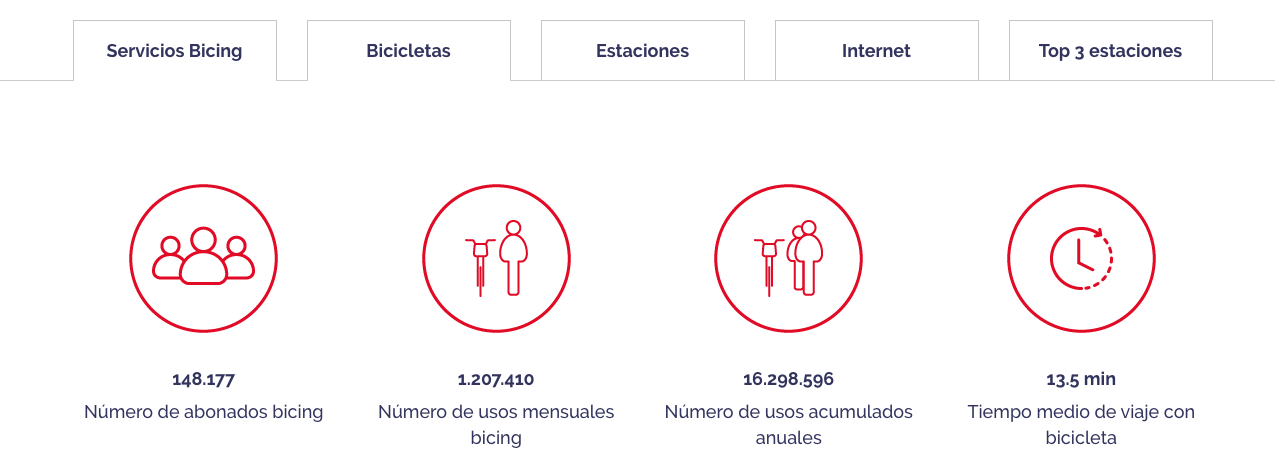

In [109]:
from IPython.display import Image

Image(filename="../../assets/bicing-3.png")

I do not have information in the dataset to validate this